In [37]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json 
from collections import Counter
import random
import numpy as np
from sklearn.manifold import TSNE

**Word Cloud for the whole corpus**

['elon', 'musk', 'vivek', 'ramaswamy', 'businessmen', 'president', 'elect', 'donald', 'j', 'trump', 'tapped', 'lead', 'new', 'department', 'government', 'efficiency', 'met', 'lawmaker', 'early', 'december', 'laid', 'plan', 'cutting', 'federal', 'spending', 'eliminating', 'waste', 'less', 'two', 'week', 'later', 'helped', 'topple', 'page', 'bill', 'brought', 'brink', 'shutdown', 'objection', 'billion', 'dollar', 'called', 'pork', 'legislation', 'streamlined', 'package', 'ultimately', 'passed', 'failed', 'offer', 'restraint', 'negotiation', 'mr', 'even', 'abolishing', 'nation', 'statutory', 'debt', 'limit', 'republican', 'long', 'used', 'tool', 'forcing', 'painful', 'budget', 'cut', 'frenzy', 'demonstrated', 'clout', 'establish', 'enterprise', 'outcome', 'also', 'underscored', 'initiative', 'face', 'try', 'curb', 'recent', 'decade', 'become', 'increasingly', 'sprawling', 'congress', 'fractious', 'making', 'difficult', 'put', 'dent', 'national', 'topped', 'trillion', 'newt', 'gingrich', '

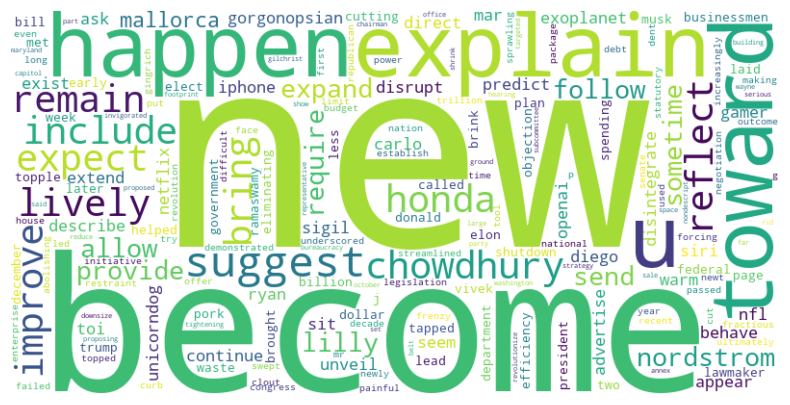

In [38]:
# Preprocessed content (sample data from the given structure)
with open('tokens_corpus.json', 'r') as file:
    tokens = json.load(file)['vocabulary']

print(tokens)
# Convert tokens into a space-separated string
text = ' '.join(tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

**Word Cloud for a given document**

['daniel', 'werfel', 'commissioner', 'internal', 'revenue', 'service', 'testified', 'house', 'committee', 'early', 'year', 'tried', 'explain', 'pandemic', 'era', 'program', 'become', 'expensive', 'government', 'boondoggle', 'congress', 'created', 'employee', 'retention', 'tax', 'credit', 'support', 'business', 'nonprofit', 'continued', 'paying', 'employee', 'despite', 'facing', 'difficulty', 'pandemic', 'time', 'went', 'public', 'health', 'crisis', 'faded', 'company', 'lined', 'claim', 'government', 'support', 'egged', 'third', 'party', 'company', 'told', 'could', 'eligible', 'million', 'mr', 'werfel', 'said', 'got', 'away', 'aggressive', 'promoter', 'marketer', 'started', 'opinion', 'taking', 'advantage', 'honest', 'small', 'business', 'getting', 'believe', 'eligible', 'credit', 'truly', 'werent', 'eligible', 'mr', 'werfel', 'told', 'lawmaker', 'february', 'seated', 'behind', 'mr', 'werfel', 'hearing', 'room', 'last', 'february', 'billy', 'long', 'president', 'elect', 'donald', 'j', '

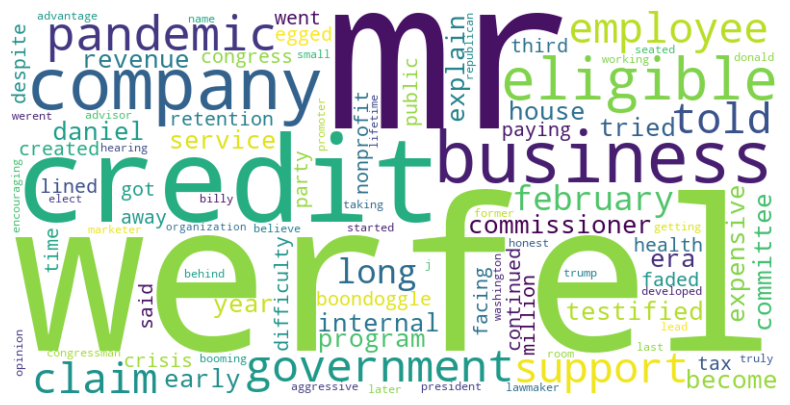

In [33]:
# Preprocessed content (sample data from the given structure)
with open('tokens_docs.json', 'r') as file:
    tokens = json.load(file)["preprocessed_content"]["3"]

print(tokens)
# Convert tokens into a space-separated string
text = ' '.join(tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

**Pie Chart for corpus category distribution**

In [34]:
# Load the JSON file
with open("all_documents.json", "r") as file:
    documents = json.load(file)

# Count the categories
category_counts = Counter(article["categorie"] for article in documents)
print(category_counts)

Counter({'general': 25, 'science': 10, 'business': 8, 'sports': 8, 'technology': 8})


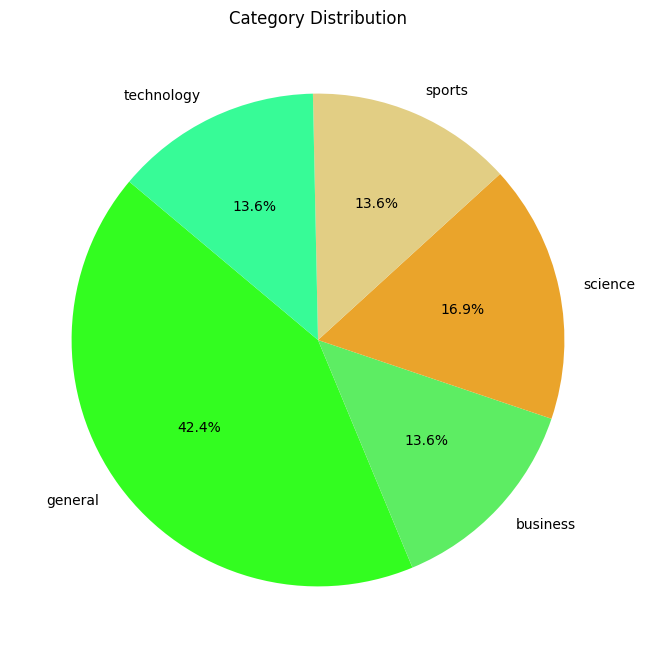

In [35]:
categories = list(category_counts.keys())
counts = list(category_counts.values())

# Function to generate random color
def random_color():
    return (random.random(), random.random(), random.random())

# Generate a list of random colors for each slice
colors = [random_color() for _ in range(len(categories))]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Category Distribution")
plt.show()

**Top most frequent words in corpus**

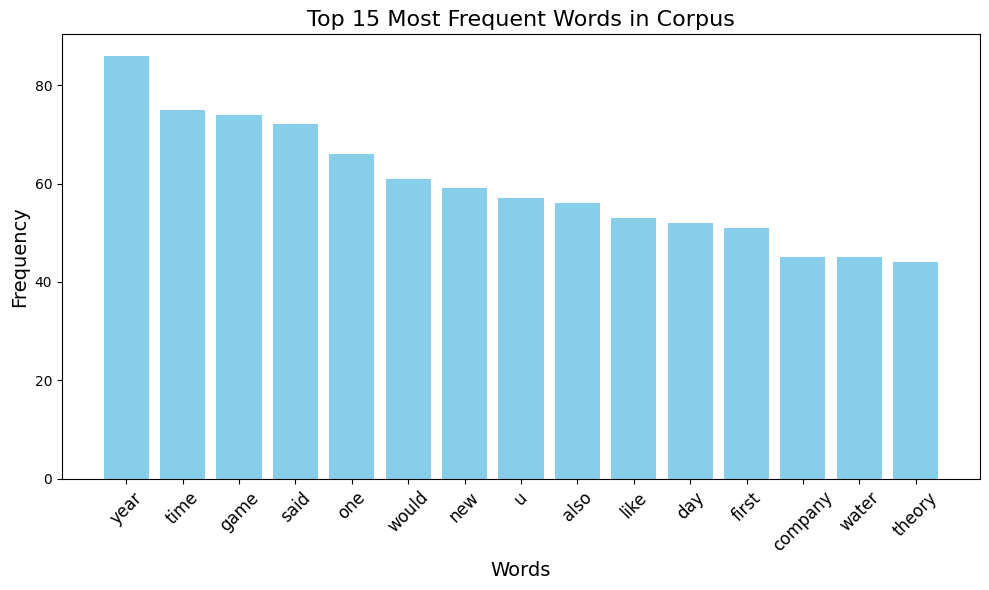

In [29]:
# Load the JSON file
with open("tokens_docs.json", "r") as file:
    documents = json.load(file) 

# Step 1: Aggregate all words
all_words = []
for doc_words in documents["preprocessed_content"].values():
    all_words.extend(doc_words)

# Step 2: Count word frequencies
word_counts = Counter(all_words)

# Step 3: Get the top N most common words
top_n = 15  # Adjust as needed
most_common_words = word_counts.most_common(top_n)

# Split words and counts for visualization
words, counts = zip(*most_common_words)

# Step 4: Visualize with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(f"Top {top_n} Most Frequent Words in Corpus", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

**T-SNE (t-distributed stochastic neighbor embedding) : 
t-SNE transforms data from xD to 2D|3D while trying to maintain the relationships between data points.**

C:\Users\Soraya Khene\AppData\Local\Temp\ipykernel_17256\2852668492.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced[:, 0], reduced[:, 1], s=50, alpha=0.7, cmap='viridis')


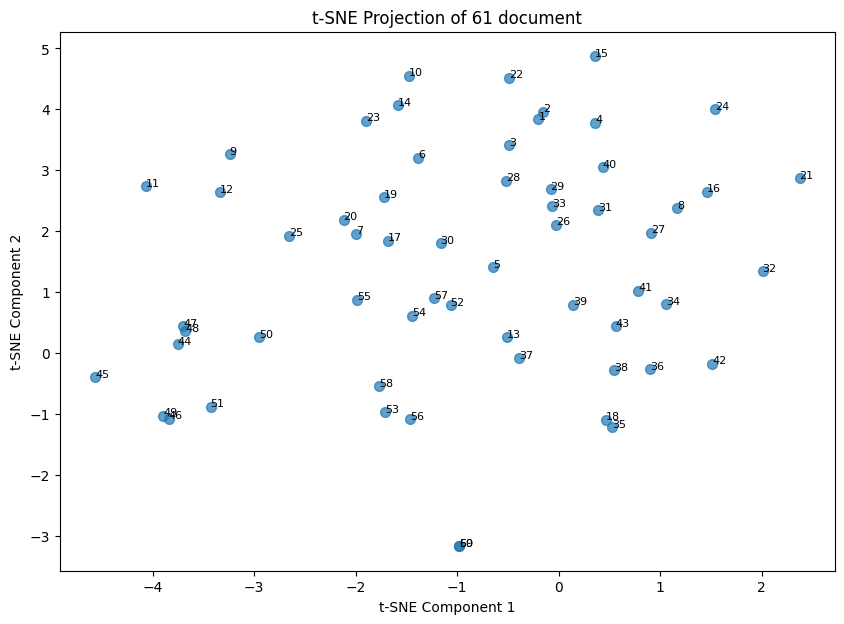

In [30]:
# Load the data from the JSON file
with open("distilbert_vectors.json", "r") as file:
    documents = json.load(file)

# Extract vectors as a list of lists (ignoring the keys)
vectors = list(documents.values())

# Convert the list of vectors to a NumPy array
vectors_array = np.array(vectors)

# Apply t-SNE
reduced = TSNE(n_components=2).fit_transform(vectors_array)
# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced[:, 0], reduced[:, 1], s=50, alpha=0.7, cmap='viridis')

# Add labels or titles
plt.title("t-SNE Projection of 61 document")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
for i, label in enumerate(documents.keys()):
    plt.text(reduced[i, 0], reduced[i, 1], label, fontsize=8)
plt.show()

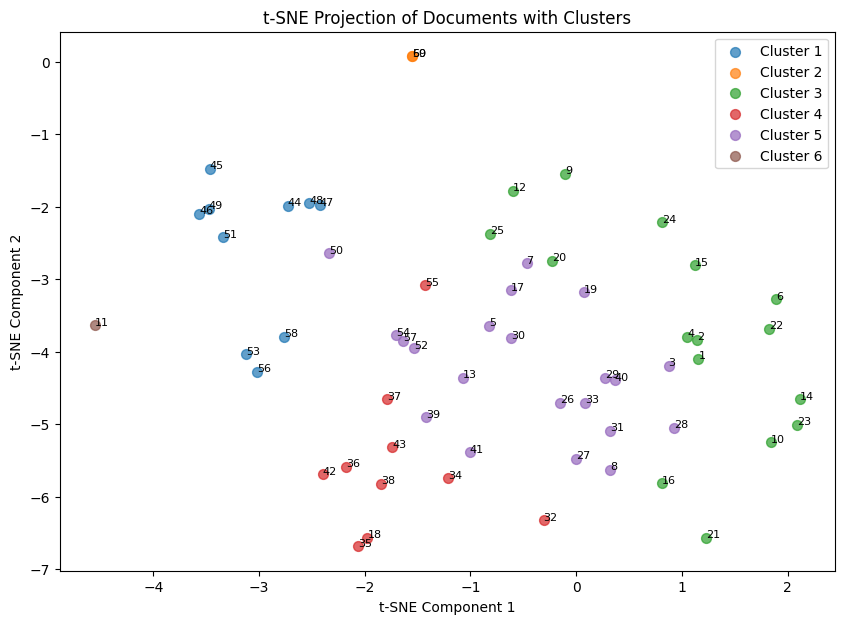

In [52]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Load the data from the JSON file
with open("distilbert_vectors.json", "r") as file:
    documents = json.load(file)

# Extract vectors as a list of lists (ignoring the keys)
vectors = list(documents.values())

# Convert the list of vectors to a NumPy array
vectors_array = np.array(vectors)

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(vectors_array)

# Apply KMeans clustering (you can adjust the number of clusters as needed)
num_clusters = 6  # Example: 3 clusters, change based on your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(cosine_sim)

# Get the cluster labels
labels = kmeans.labels_

# Apply t-SNE for dimensionality reduction to 2D
reduced = TSNE(n_components=2, metric="cosine").fit_transform(vectors_array)

# Plot the clusters
plt.figure(figsize=(10, 7))

# Plot points with cluster colors
for i in range(num_clusters):
    cluster_points = reduced[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}', s=50, alpha=0.7)

# Add labels or titles
plt.title("t-SNE Projection of Documents with Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# Optionally, add document labels for each point
for i, label in enumerate(documents.keys()):
    plt.text(reduced[i, 0], reduced[i, 1], label, fontsize=8)

# Show legend
plt.legend()

# Display the plot
plt.show()


**Cosine similarity heat map**

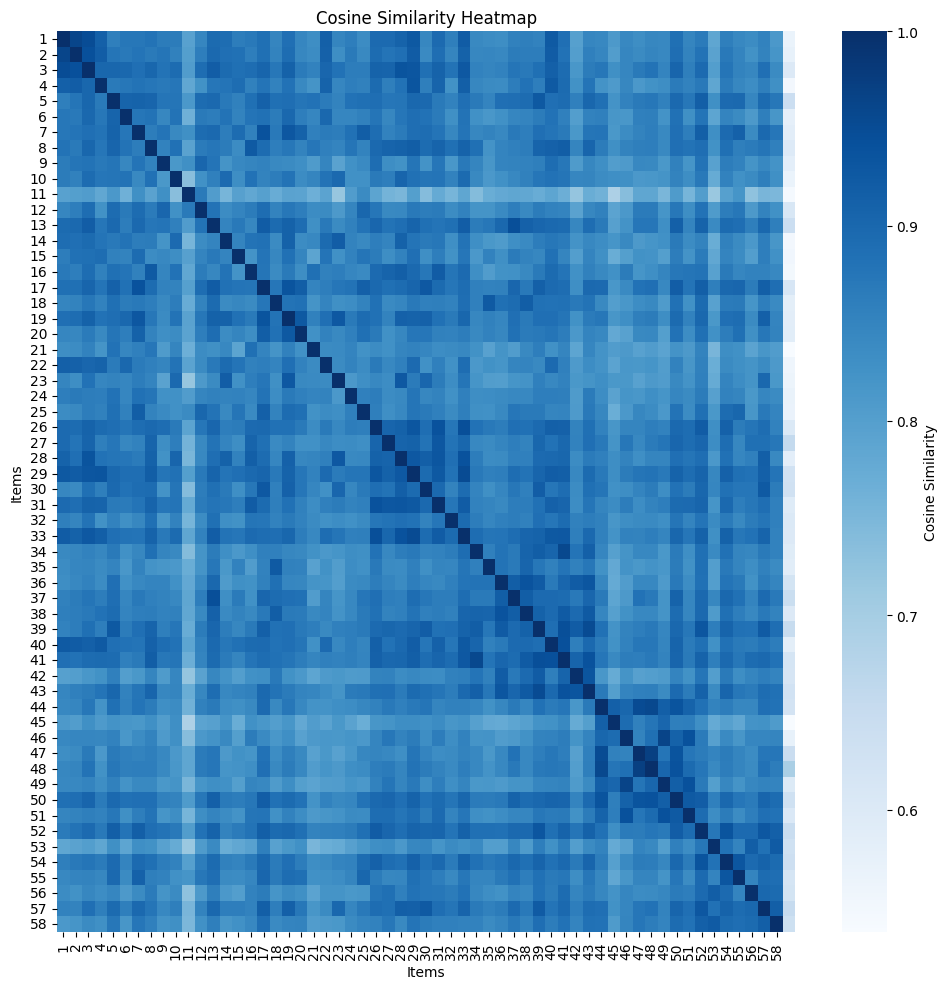

In [31]:
# Attempt to skip problematic lines
df = pd.read_csv(
    "document_similarity_matrix.csv",
    # skiprows=1,  # Skip header line
    index_col=0,  # Use the first column as the index
    on_bad_lines="skip"  # Skip bad lines
)

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(
    df,
    cmap="Blues",
    annot=False,  # Set to True if you want to display values in the cells
    fmt=".3f",
    xticklabels=df.index,
    yticklabels=df.index,
    cbar_kws={"label": "Cosine Similarity"}
)
plt.title("Cosine Similarity Heatmap")
plt.xlabel("Items")
plt.ylabel("Items")
plt.tight_layout()
plt.show()
